In [40]:
%matplotlib inline

In [41]:
import preprocessing as prep
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import helper as hlp
from bb_binary import FrameContainer, Repository, load_frame_container
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import itertools
from collections import Counter

import helper as hlp
import time
import datetime
import sys

In [42]:
def RepoToDF(path, year):
    repo = Repository(path)
    file_list = []
    
    for f in repo.iter_fnames():
        string = f.split("/{}/".format(year))
        datum = string[1].split("/")
        file_list.append([datum[0], datum[1], datum[2], f])
    
    # DataFrame with all files
    return DataFrame(file_list, columns=['m', 'd', 'h', 'file'])

In [43]:
def NumberOfFilesPerHourDF(b, e, df, year):    
    gr = df.groupby(by=["m", "d", "h"])
    mdh = []
    c = []

    for g, group in gr:
        m,d,h = g
        files = (list(group.file))
        a = [int(f.split('/')[-1].split("_")[1]) for f in files]
        mdh.append([m,d,h])
        c.append(Counter(a))
    
    dfmdh = DataFrame(mdh, columns=["m", "d", "h"])
    
    dfc = DataFrame(c).fillna(value=0)
    dfc.columns = ["cam0", "cam1", "cam2", "cam3"]
    
    df_all = pd.concat([dfmdh, dfc], axis=1)
    df_all['summ'] = df_all.ix[:,3:].sum(axis=1)
    
    df_all.set_index(df_all.apply(lambda x: datetime.datetime(year,int(x.m),int(x.d),int(x.h)), axis=1), inplace=True)
    index = pd.date_range(b, e, freq='H')
    df_i = DataFrame(index=index)
    
    res = pd.concat([df_i, df_all], axis=1)
    
    return res.fillna(0)

# Data 2016

In [44]:
path = "/mnt/data2016/"

In [45]:
begin, end = '2016-07-19', '2016-09-19'

In [46]:
df = RepoToDF(path, '2016')

In [49]:
df_all = NumberOfFilesPerHourDF(begin, end, df, 2016)

In [50]:
df_all.iloc[[0,10,20]]

,m,d,h,cam0,cam1,cam2,cam3,summ
2016-07-19 00:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0
2016-07-19 10:00:00,0,0,0,0.0,0.0,0.0,0.0,0.0
2016-07-19 20:00:00,07,19,20,9.0,10.0,11.0,11.0,41.0


In [51]:
sns.set_context("paper")

In [52]:
def plotDF(df, column, year, ymin=None, ymax=None):
    fig, ax = plt.subplots()
    sns.tsplot(data=df['{}'.format(column)], err_style="ci_bars", color="g", ax=ax, )
    fig.set_size_inches(40,10)
    ax.set_title("{} - {} \n Number of files per day and hour".format(year, column))
    ax.set_ylabel("Number of files")
    
    all_labels = df.index
    xmin, xmax = ax.get_xlim()
    l = [all_labels[x] for x in np.arange(int(xmin), int(xmax), 24)]
    ax.set_xticklabels(l, rotation=90)
    ax.set_xticks(np.arange(xmin, xmax, 24))
    
    if (ymin != None and ymax != None):
        ax.set_ylim(ymin,ymax)

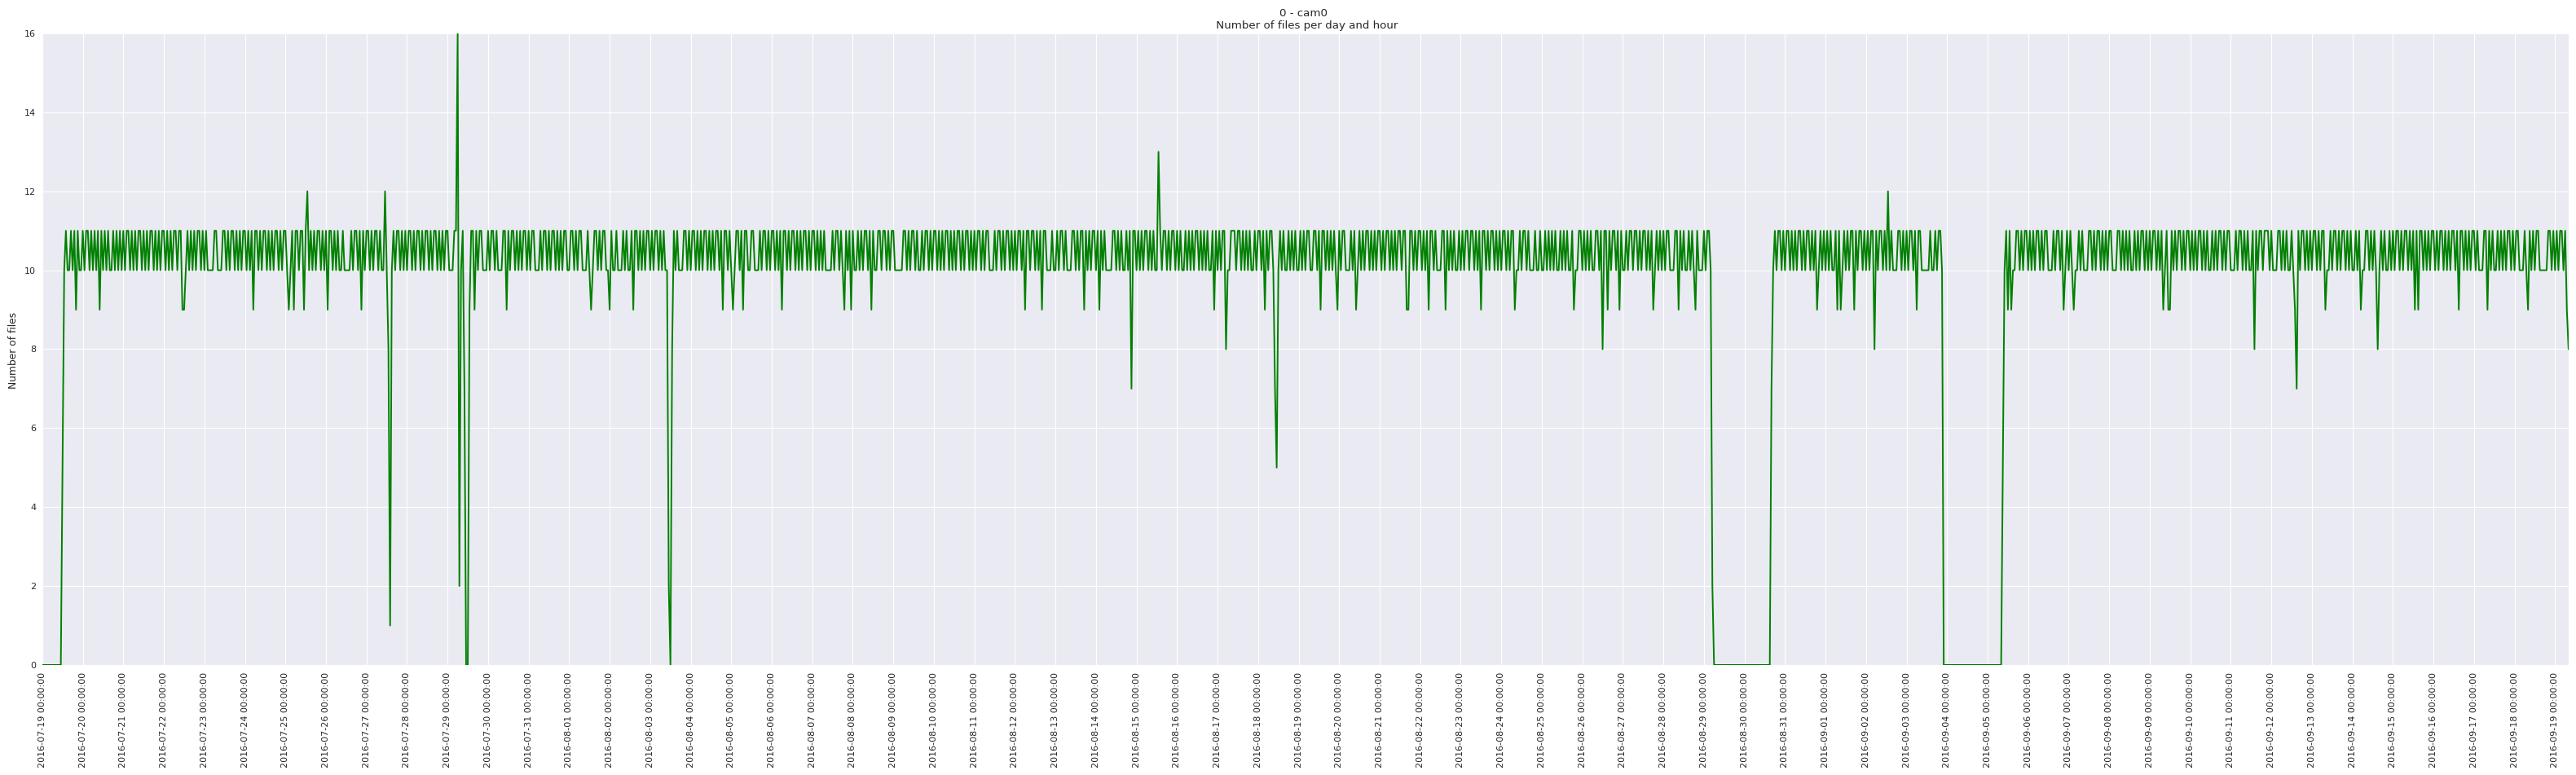

In [53]:
plotDF(df_all, 'cam0',  0, 33)

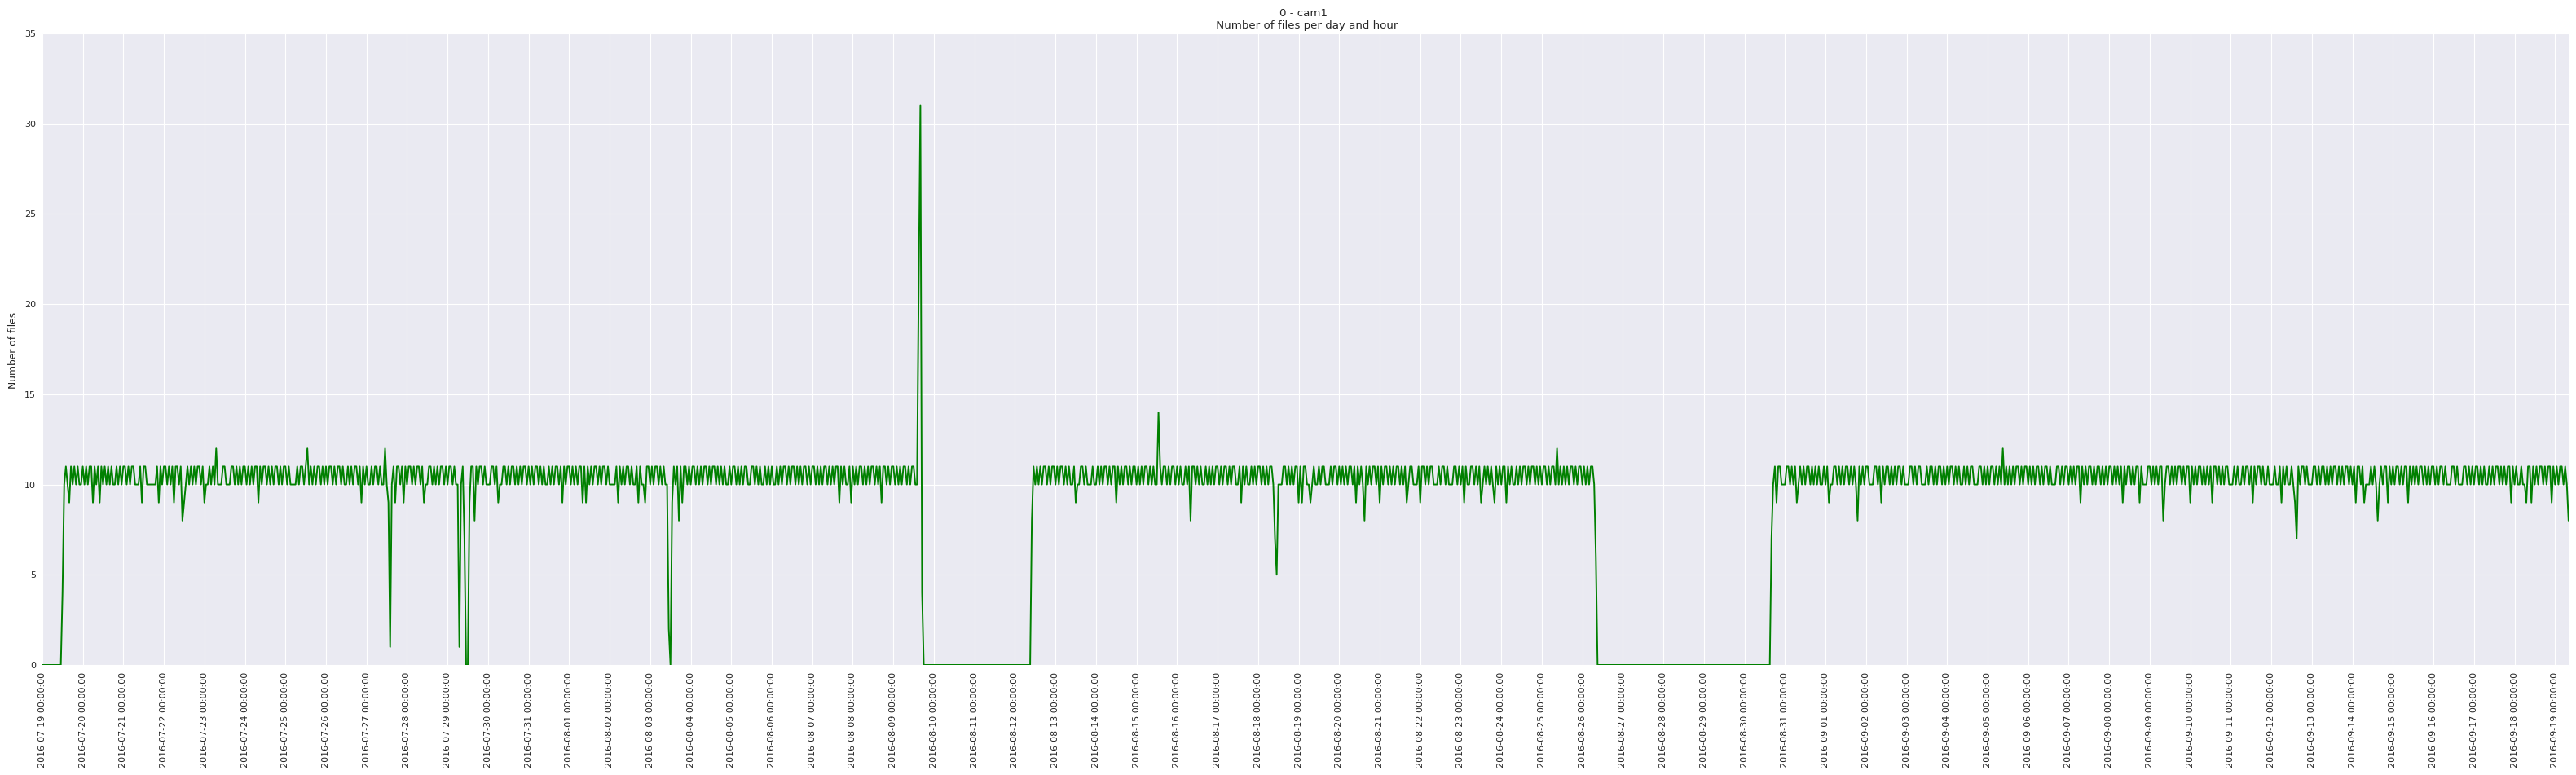

In [54]:
plotDF(df_all, 'cam1', 0,33)

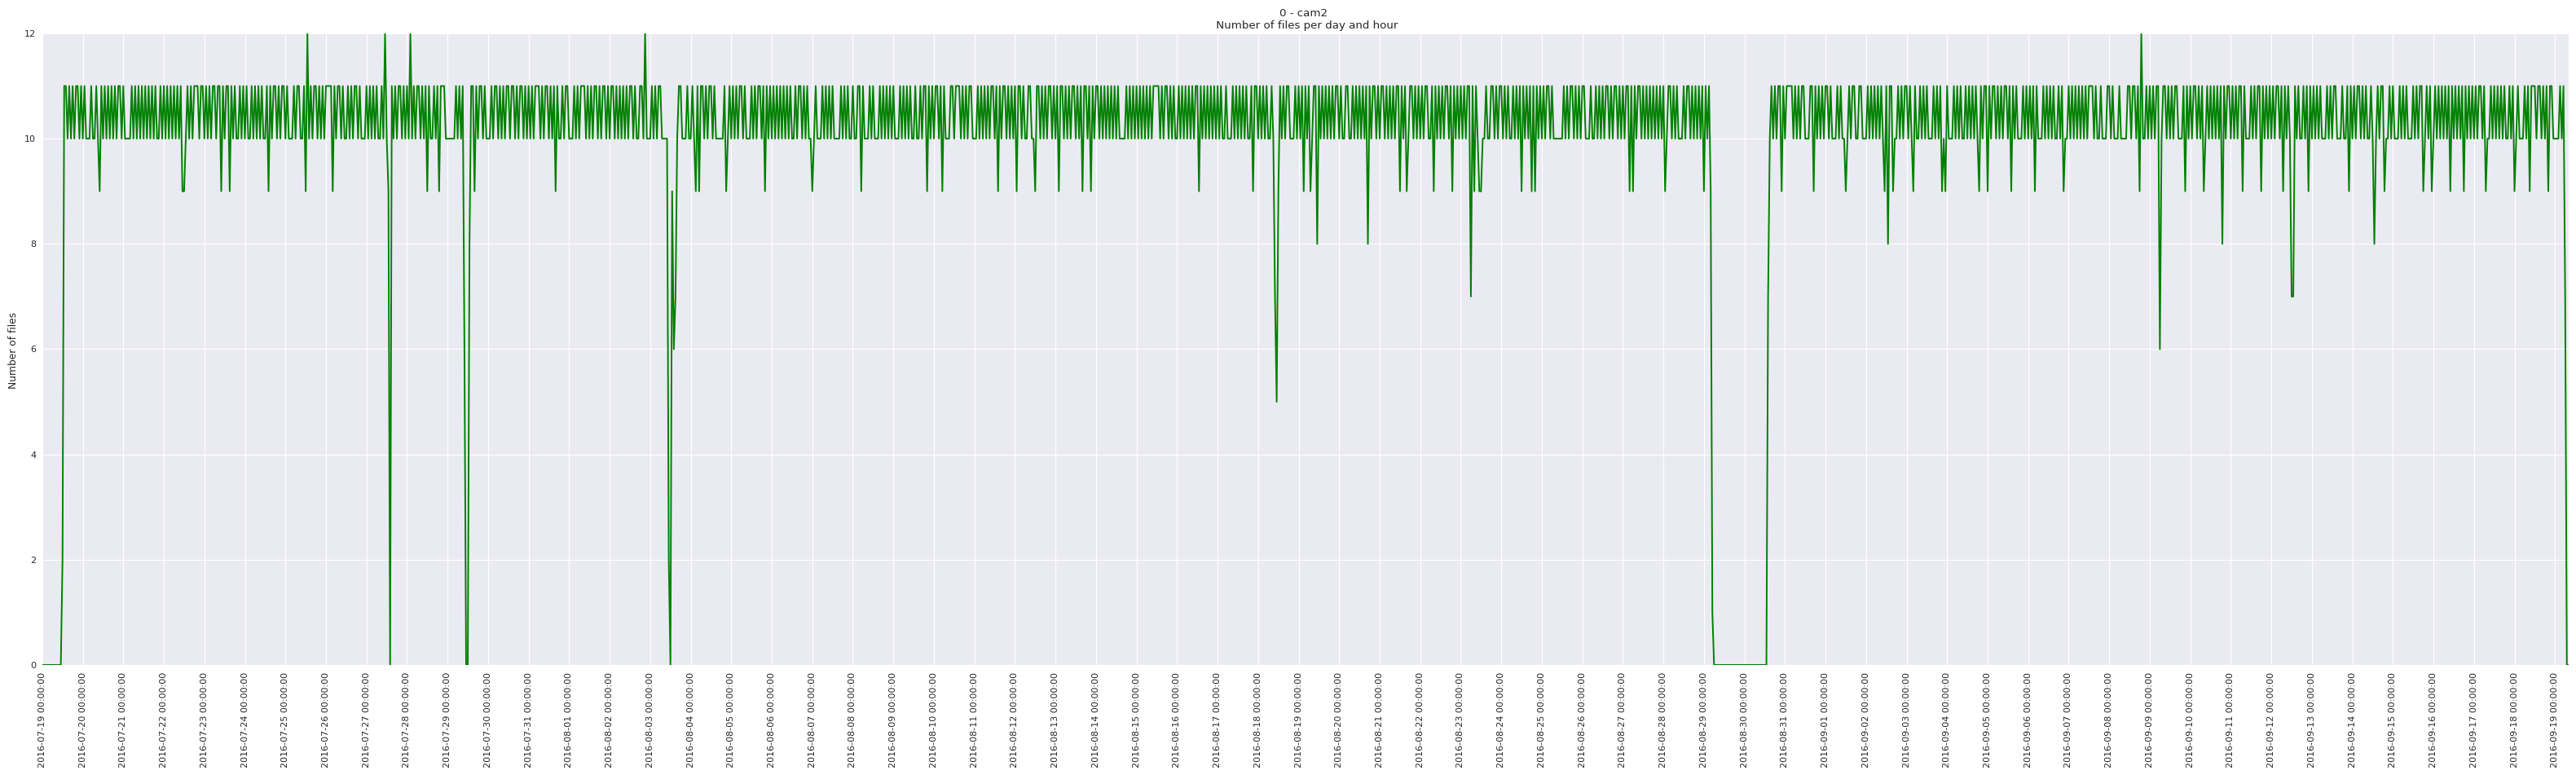

In [55]:
plotDF(df_all, 'cam2', 0,33)

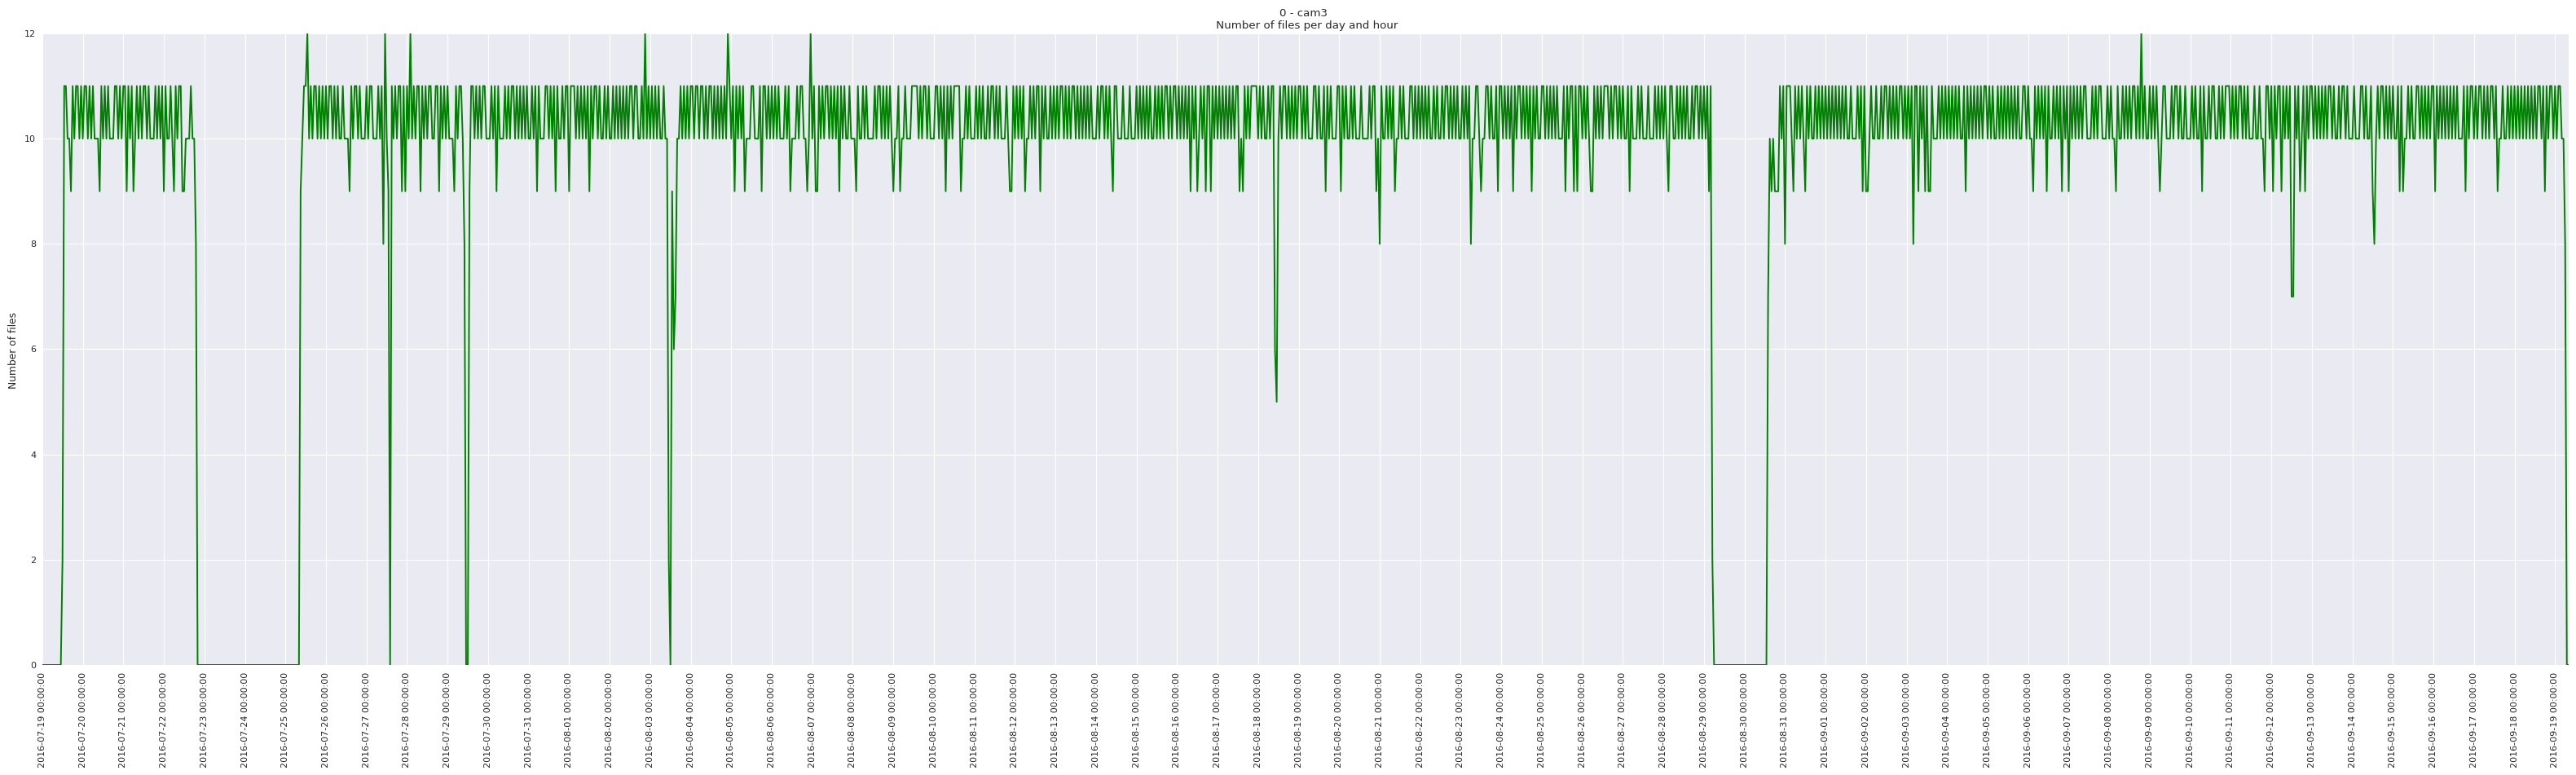

In [56]:
plotDF(df_all, 'cam3', 0,33)

## All Cams 2016

In [ ]:
plotDF(df_all,'summ')

# Data 2015

In [5]:
path2 = "/mnt/data2015/"

In [6]:
df2 = RepoToDF(path2, '2015')

In [8]:
df2.tail()

,m,d,h,file
66606,10,26,10,/mnt/data2015/2015/10/26/10/00/Cam_1_2015-10-2...
66607,10,26,10,/mnt/data2015/2015/10/26/10/00/Cam_2_2015-10-2...
66608,10,26,10,/mnt/data2015/2015/10/26/10/00/Cam_0_2015-10-2...
66609,10,26,10,/mnt/data2015/2015/10/26/10/00/Cam_1_2015-10-2...
66610,10,26,10,/mnt/data2015/2015/10/26/10/00/Cam_2_2015-10-2...


In [9]:
b, e = '2015-08-19', '2015-10-27'

In [13]:
df_all2 = NumberOfFilesPerHourDF(b,e, df2, 2015)

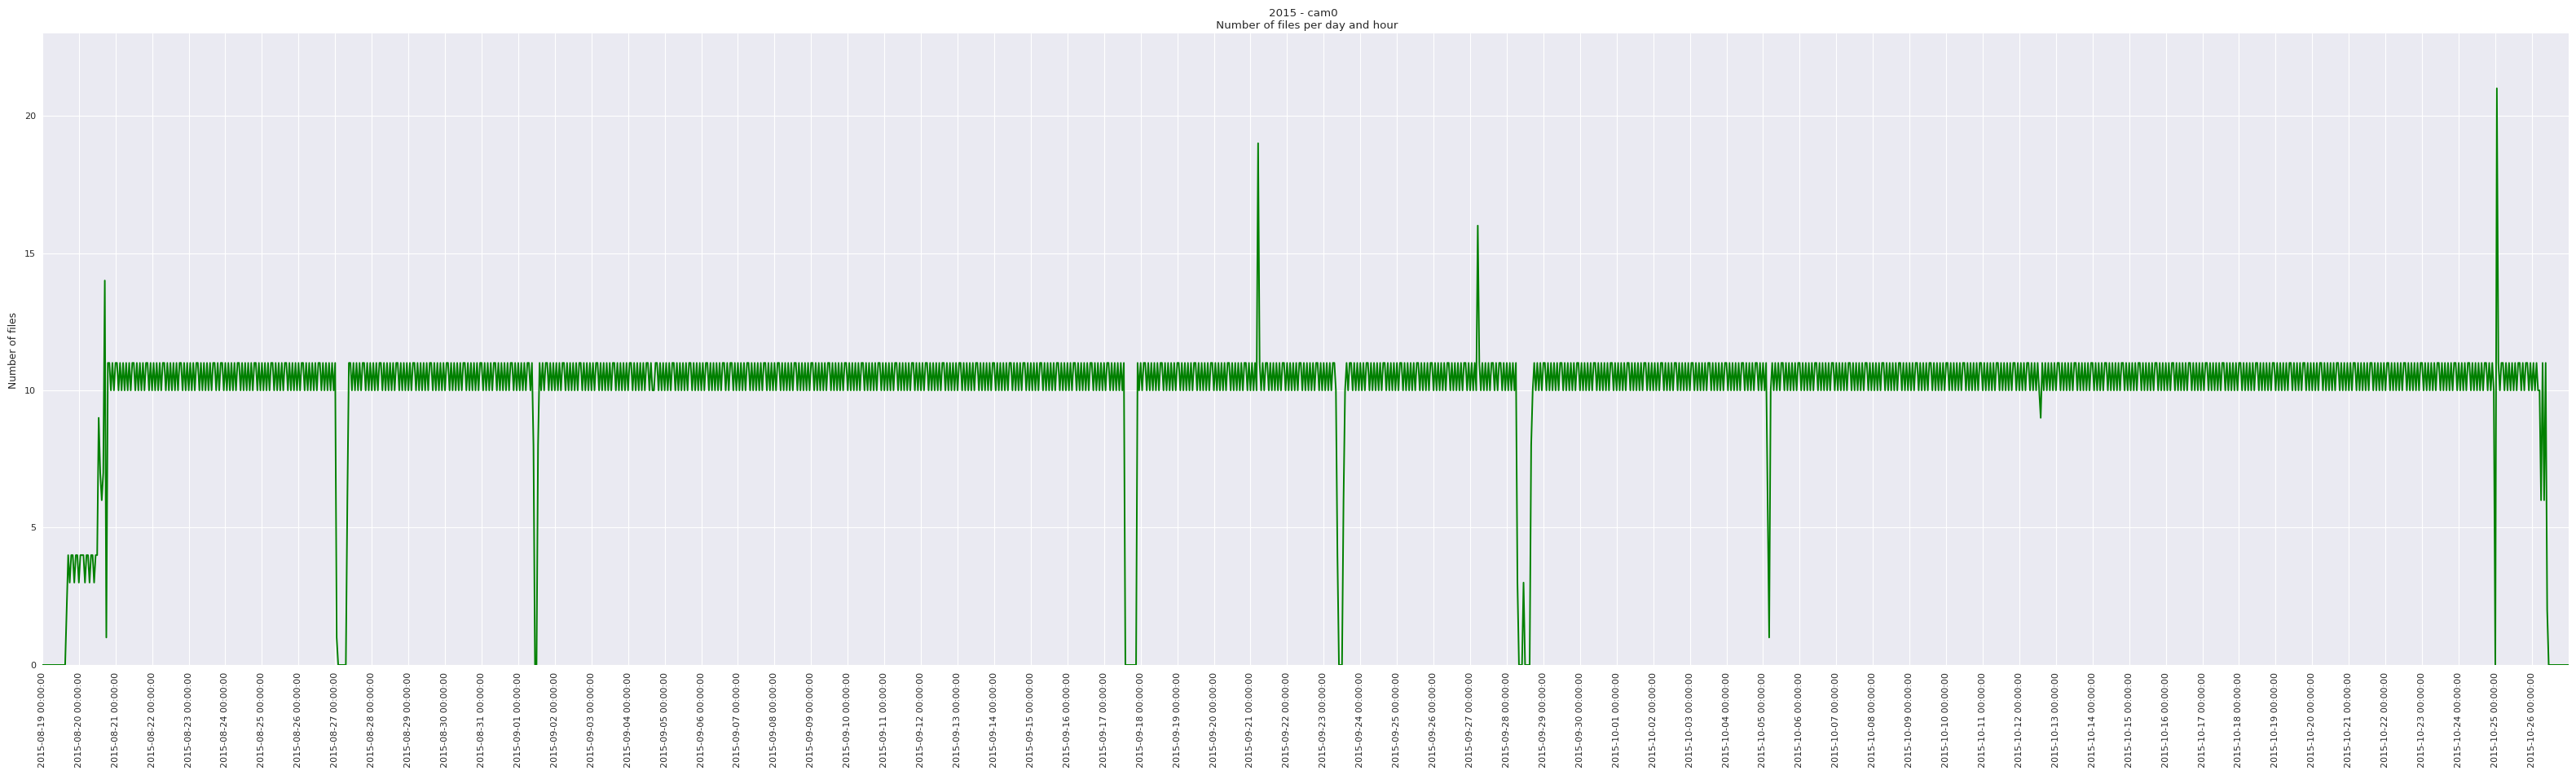

In [57]:
plotDF(df_all2, 'cam0', 2015, 0, 23)

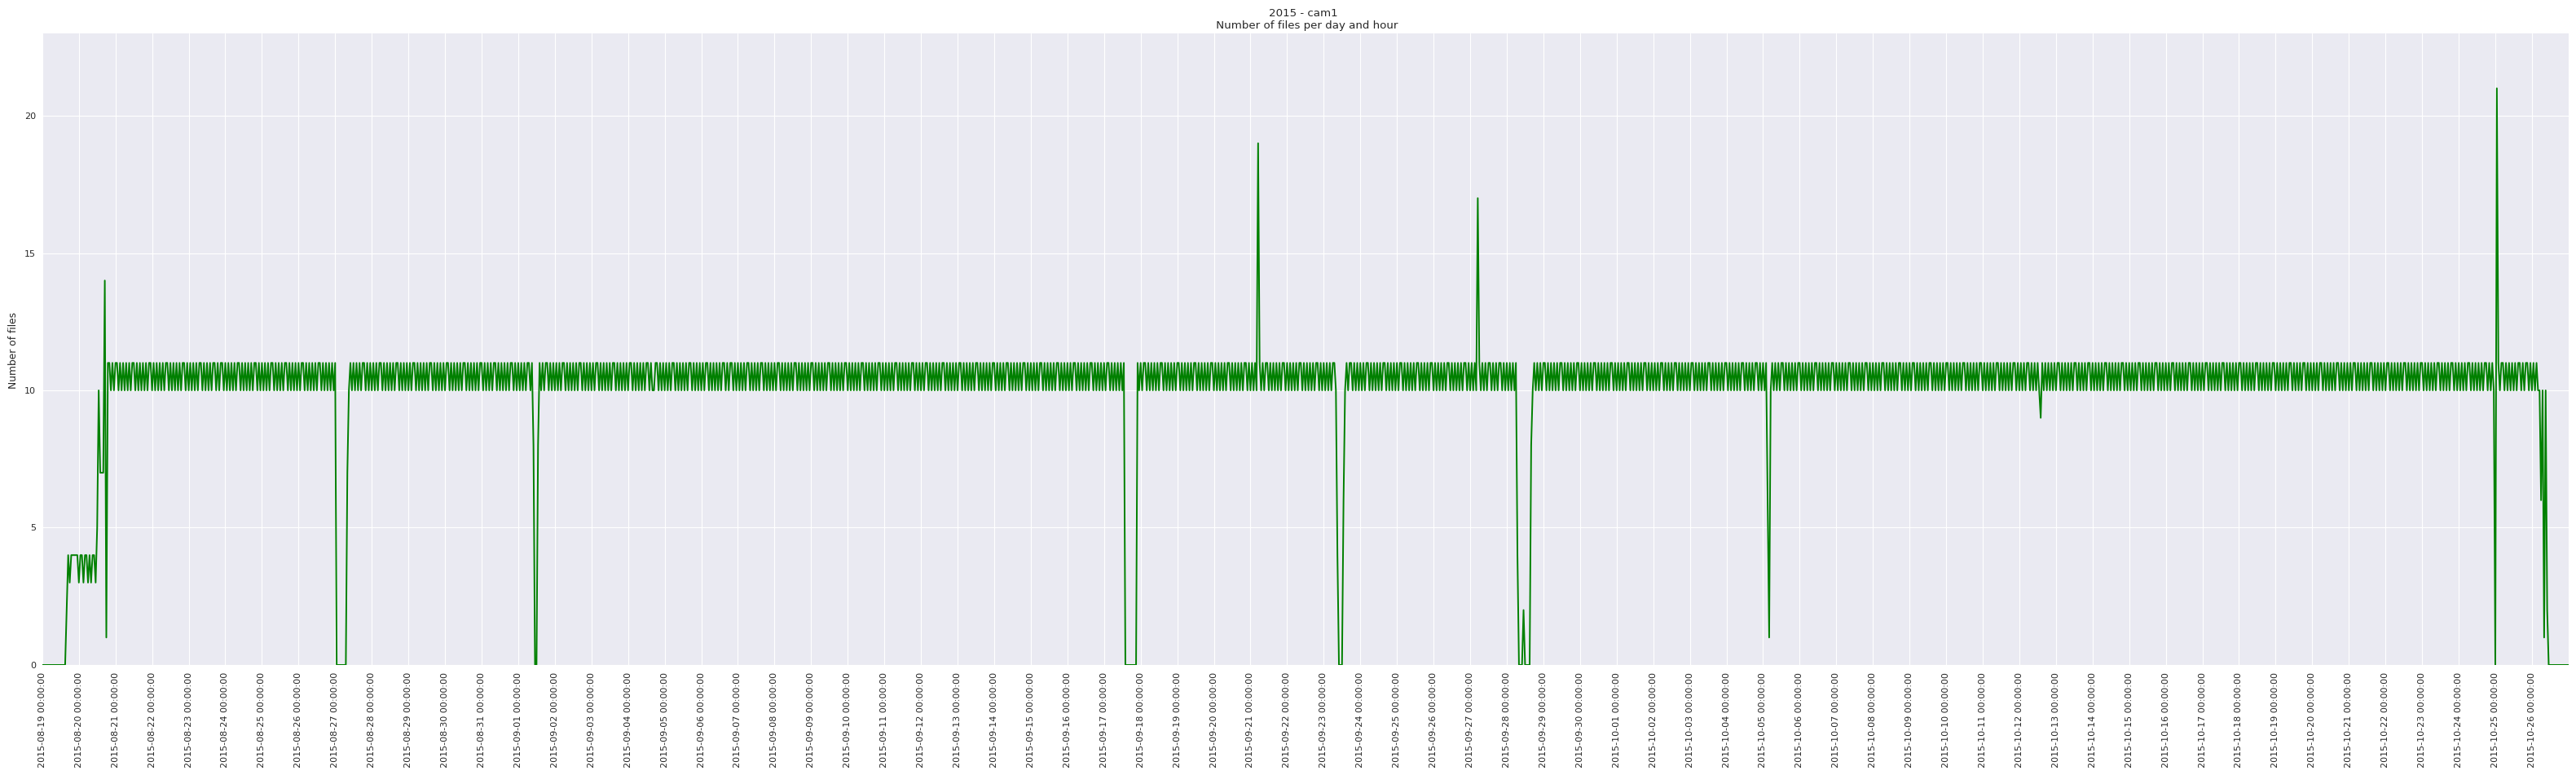

In [58]:
plotDF(df_all2, 'cam1', 2015, 0, 23)

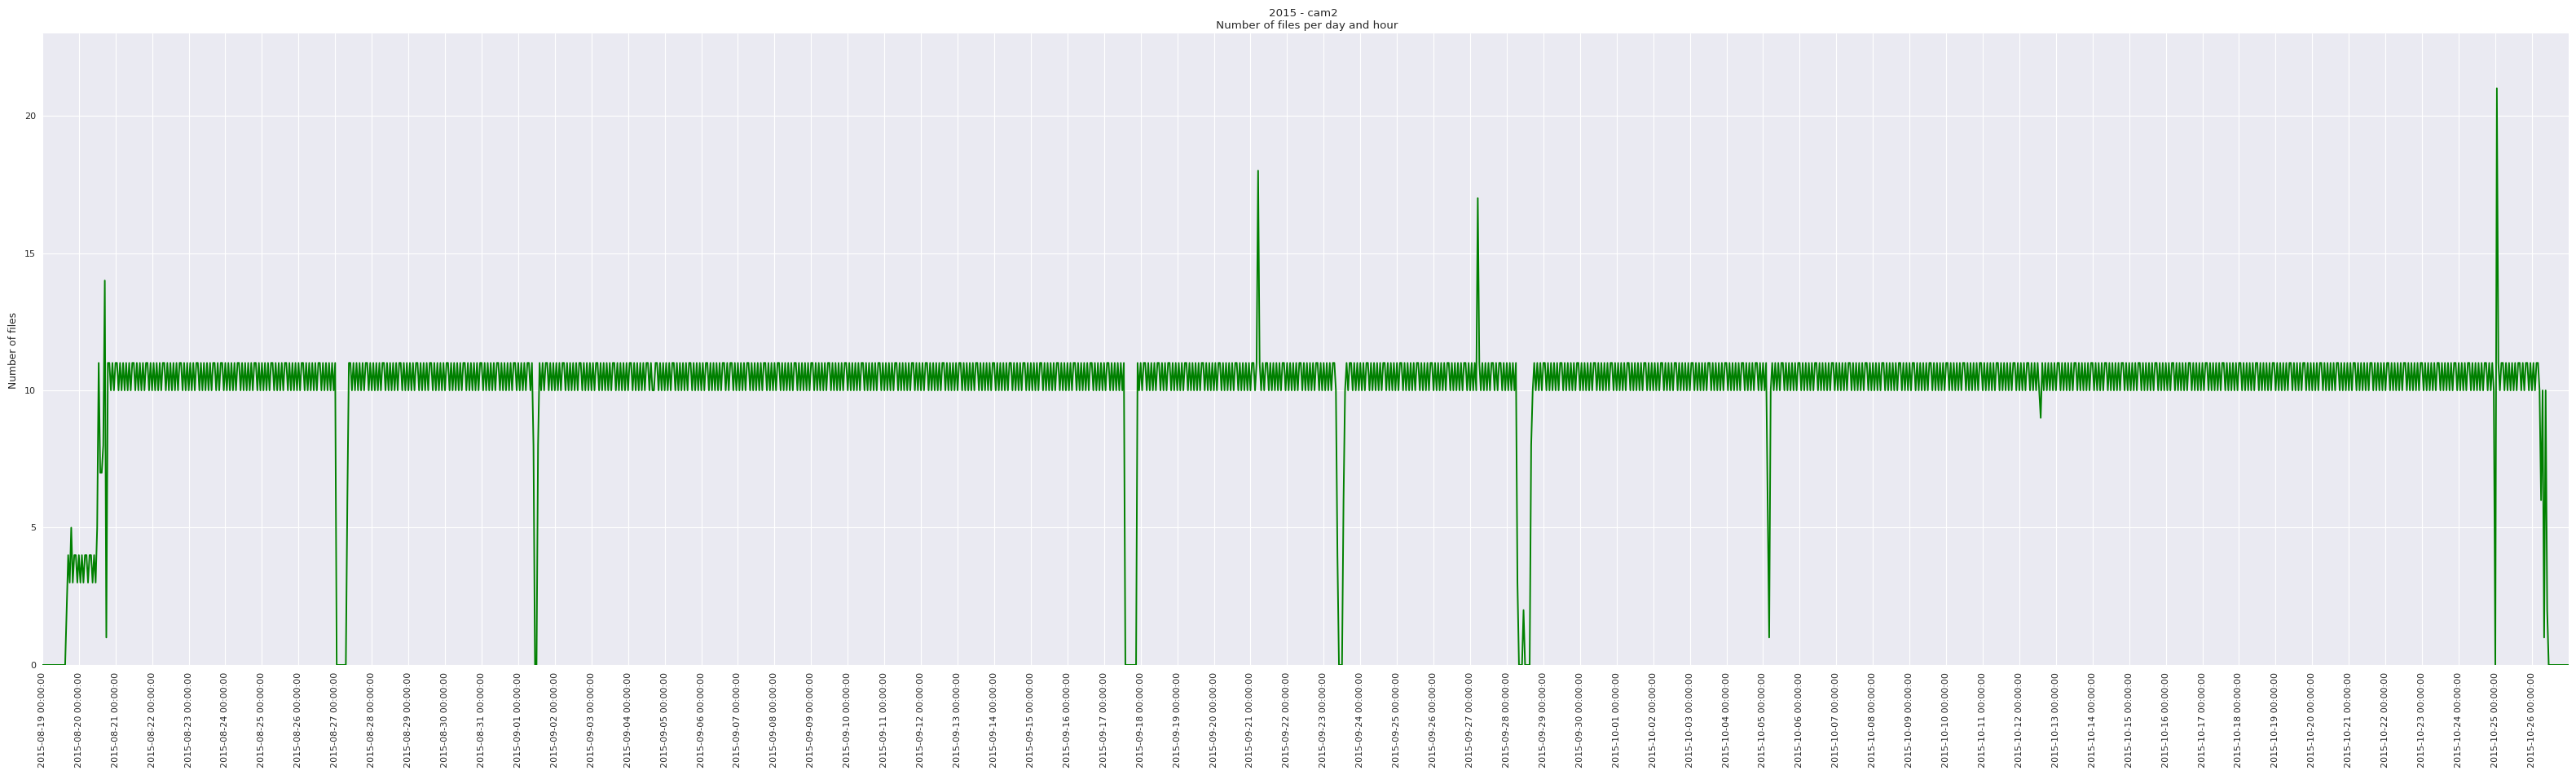

In [59]:
plotDF(df_all2, 'cam2', 2015, 0, 23)

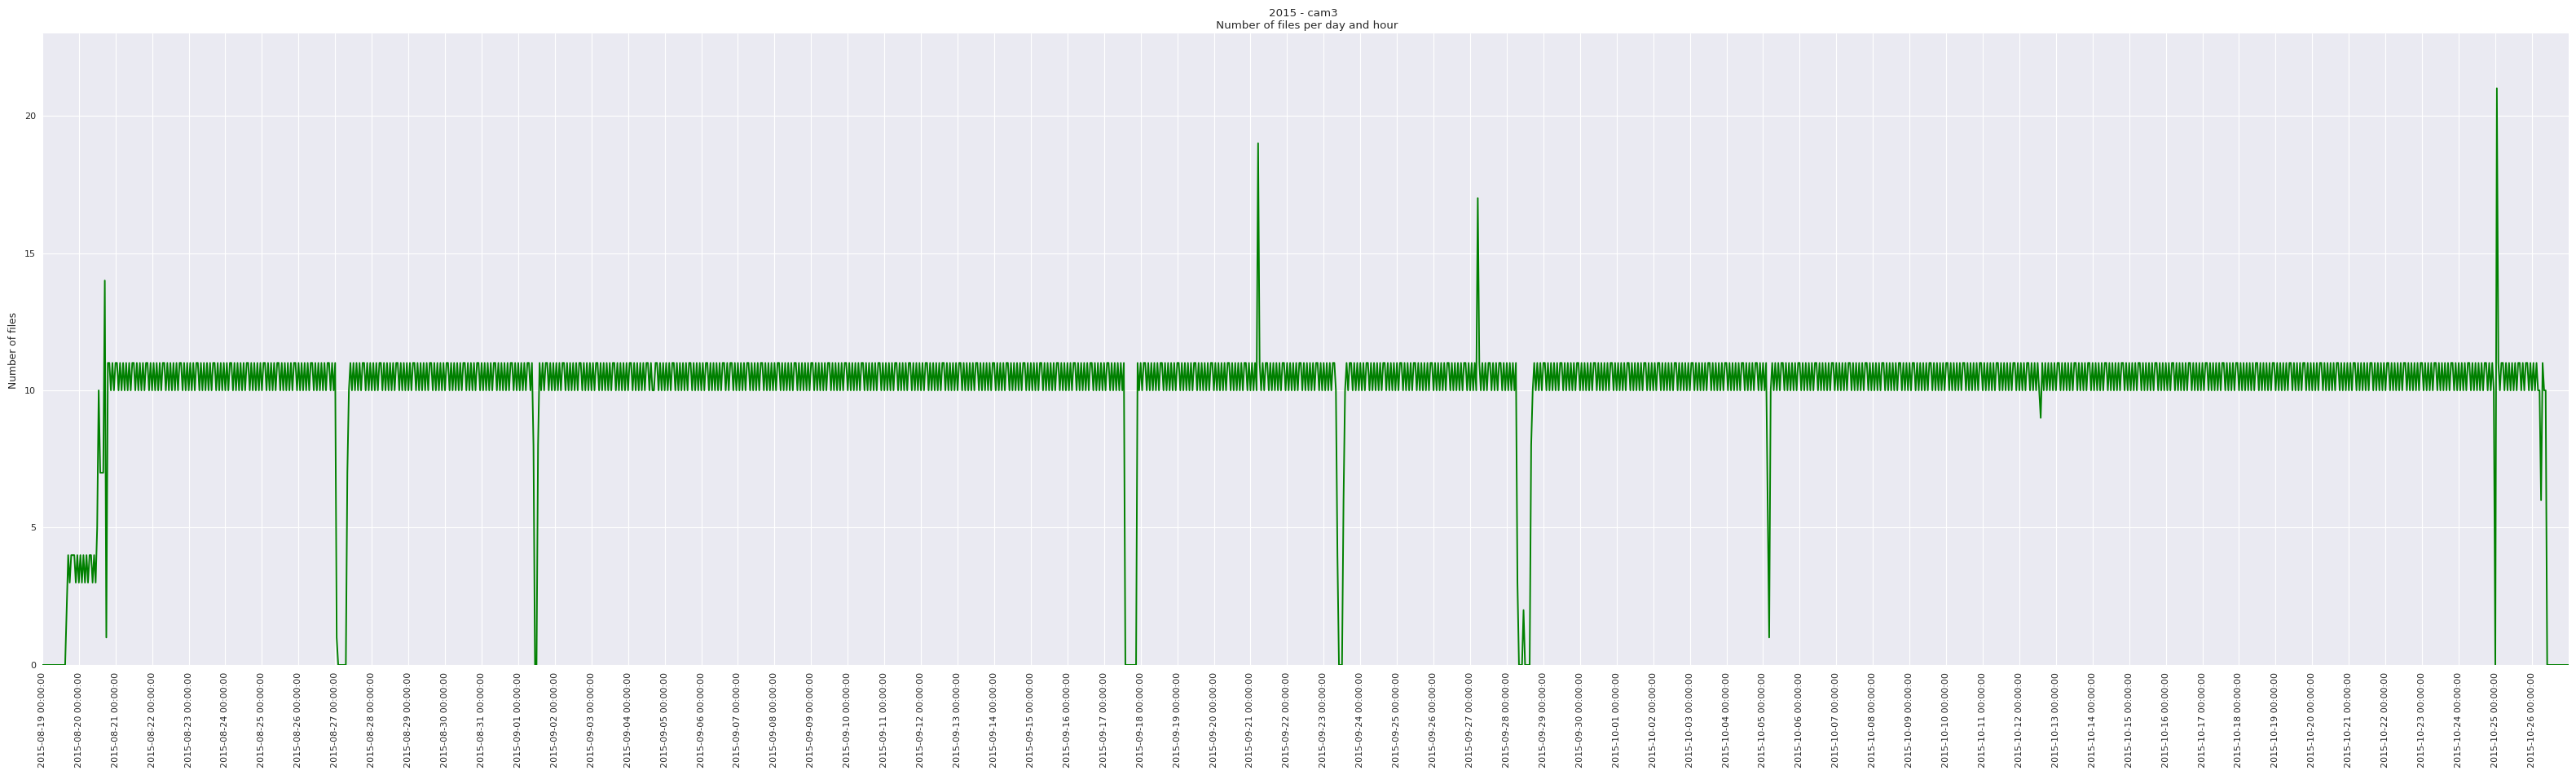

In [60]:
plotDF(df_all2, 'cam3', 2015, 0, 23)

## All Cams 2015

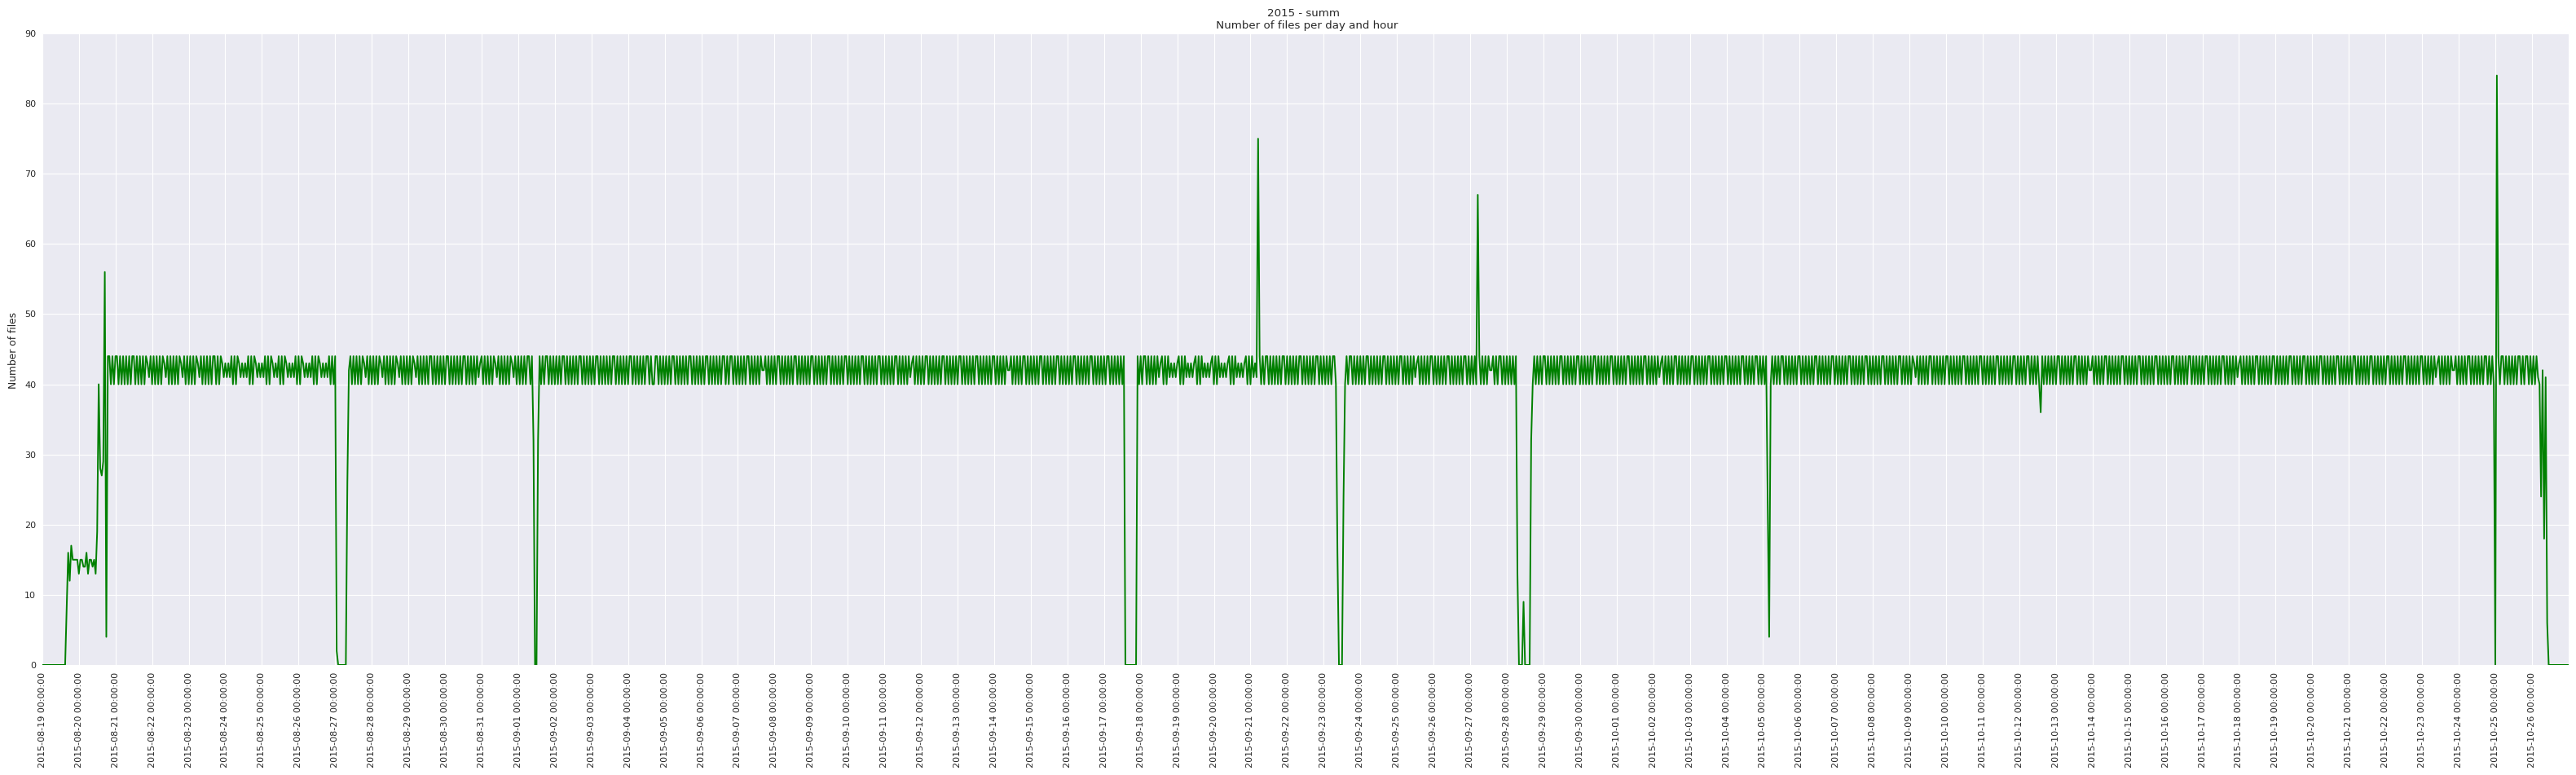

In [61]:
plotDF(df_all2, 'summ', 2015)